In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # to normalise the data
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as mse
plt.rcParams['figure.dpi'] = 200
# Load wine data



In [31]:
(X,y) = load_wine(return_X_y = True)

X = pd.DataFrame(data = X)
y = pd.Series(data = y)
Xy = pd.concat([X, y], axis=1)
(n, p) = X.shape # number of examples and dimension of each example
K = y.unique().size # number of classes
print('n=', n, ', p=', p, ', K=', K)
X.head()

n= 178 , p= 13 , K= 3


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


score:  1.0


[Text(526.1842105263157, 553.6666666666666, '12 <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(318.1578947368421, 453.0, '11 <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(195.78947368421052, 352.3333333333333, '10 <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(97.89473684210526, 251.66666666666663, '6 <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(48.94736842105263, 151.0, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(146.8421052631579, 151.0, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(293.6842105263158, 251.66666666666663, '9 <= 5.815\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(244.73684210526315, 151.0, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(342.63157894736844, 151.0, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(440.52631578947364, 352.3333333333333, '6 <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(391.57894736842104, 251.66666666666

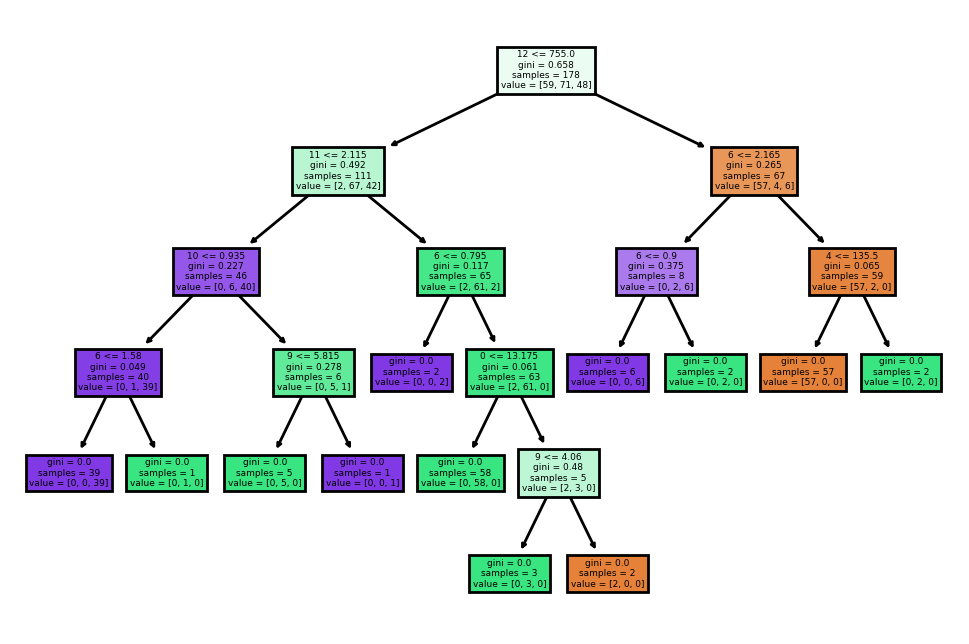

In [32]:
model1 = DecisionTreeClassifier()
model1.fit(X, y)
print('score: ', model1.score(X, y))
plot_tree(model1, feature_names = X.columns, filled = True)

Text(0.5, 1.0, 'Importance of explanatory variables')

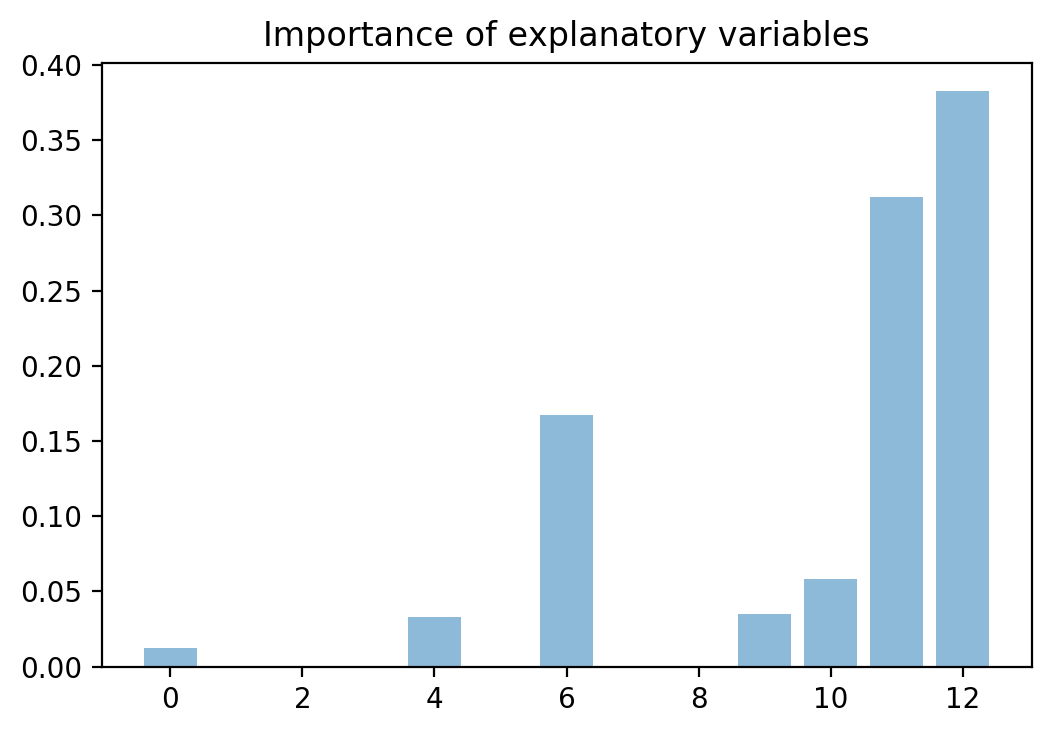

In [34]:
plt.figure()
y2 = model1.feature_importances_  
y_pos = np.arange(len(y2))
plt.bar(y_pos, y2, align='center', alpha=0.5)
plt.title('Importance of explanatory variables')

In [35]:
scores = np.zeros(11)
for nodes in range(2,13):
    model = DecisionTreeClassifier(max_leaf_nodes = nodes)
    cross_val = cross_val_score(model, X, y, cv = 5)
    scores[nodes-2] = sum(cross_val)/len(cross_val)

Text(0.5, 0, 'Number of leaves')

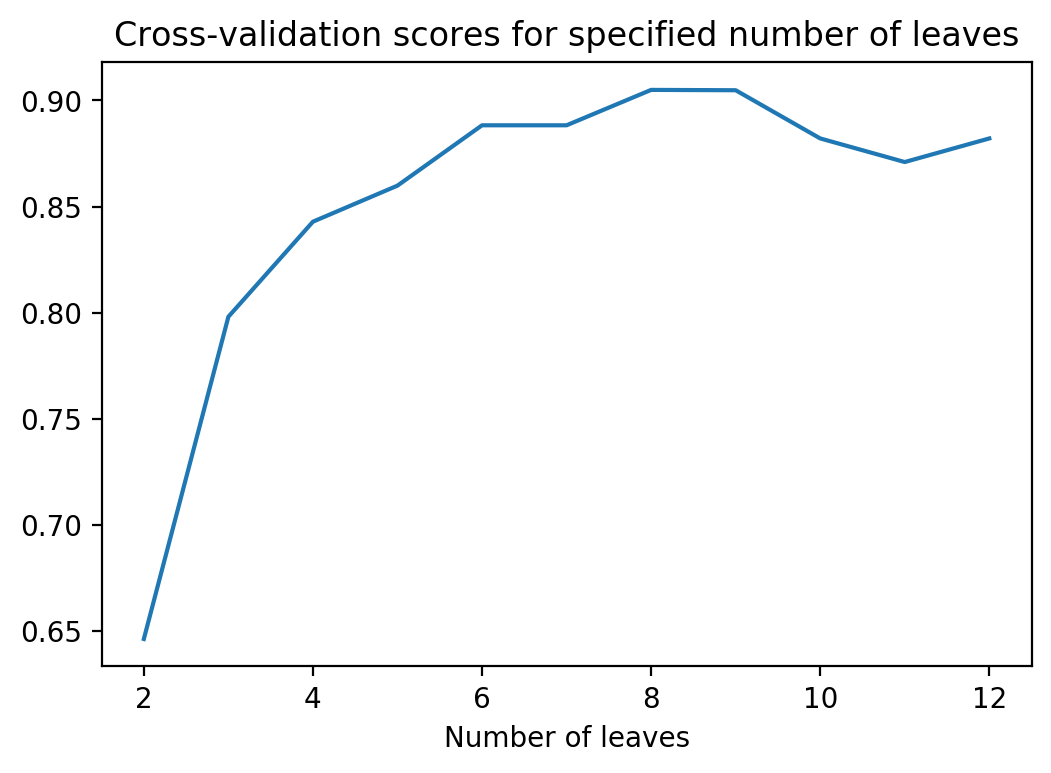

In [44]:
plt.figure()
plt.plot(np.arange(2,13), scores)
plt.title('Cross-validation scores for specified number of leaves')
plt.xlabel('Number of leaves')

score:  1.0


[Text(465.0, 528.5, '12 <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(232.5, 377.5, '11 <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(116.25, 226.5, '10 <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(58.125, 75.5, 'gini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(174.375, 75.5, 'gini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(348.75, 226.5, '6 <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(290.625, 75.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(406.875, 75.5, 'gini = 0.061\nsamples = 63\nvalue = [2, 61, 0]'),
 Text(697.5, 377.5, '6 <= 2.165\ngini = 0.265\nsamples = 67\nvalue = [57, 4, 6]'),
 Text(581.25, 226.5, '10 <= 0.803\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(523.125, 75.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 6]'),
 Text(639.375, 75.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(813.75, 226.5, '9 <= 3.435\ngini = 0.065\nsamples = 59\nvalue = [57, 

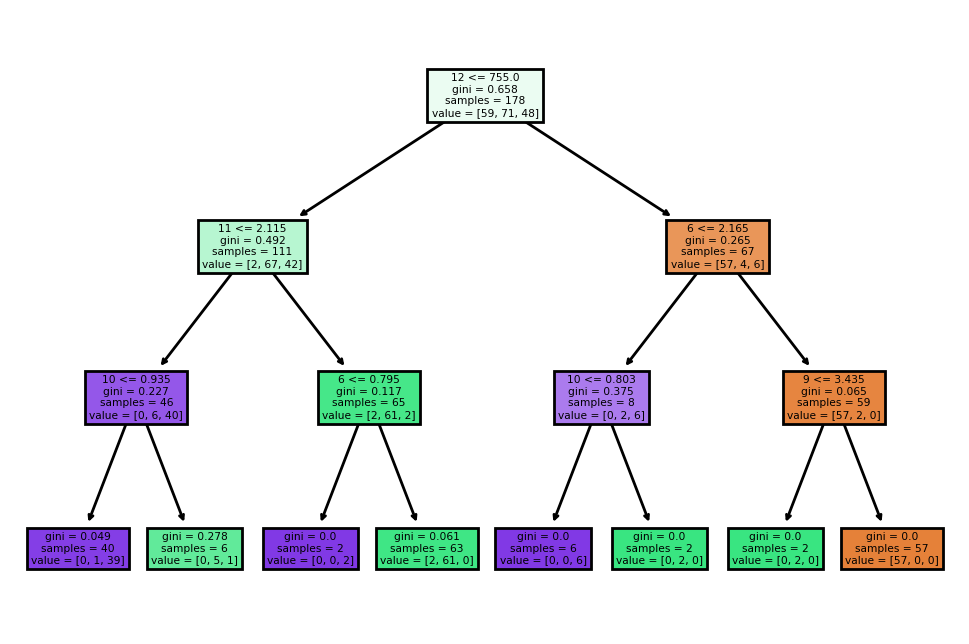

In [45]:
model2 = DecisionTreeClassifier(max_leaf_nodes = 8)
model2.fit(X, y)
print('score: ', model1.score(X, y))
plot_tree(model2, feature_names = X.columns, filled = True)

In [52]:
no_vars = range(1, X.shape[1] + 1)
scores = np.zeros(X.shape[1])
for i in range(X.shape[1]):
    model2 = RandomForestClassifier(n_estimators = 500, bootstrap = True, oob_score = True, max_features = no_vars[i])
    model2.fit(X, y)
    scores[i] = model2.oob_score_

In [53]:
scores

array([0.98876404, 0.98314607, 0.97752809, 0.98314607, 0.97752809,
       0.97752809, 0.97752809, 0.97752809, 0.97752809, 0.97752809,
       0.97191011, 0.96629213, 0.97191011])

Text(0.5, 0, 'Max number of expl. variables allowed')

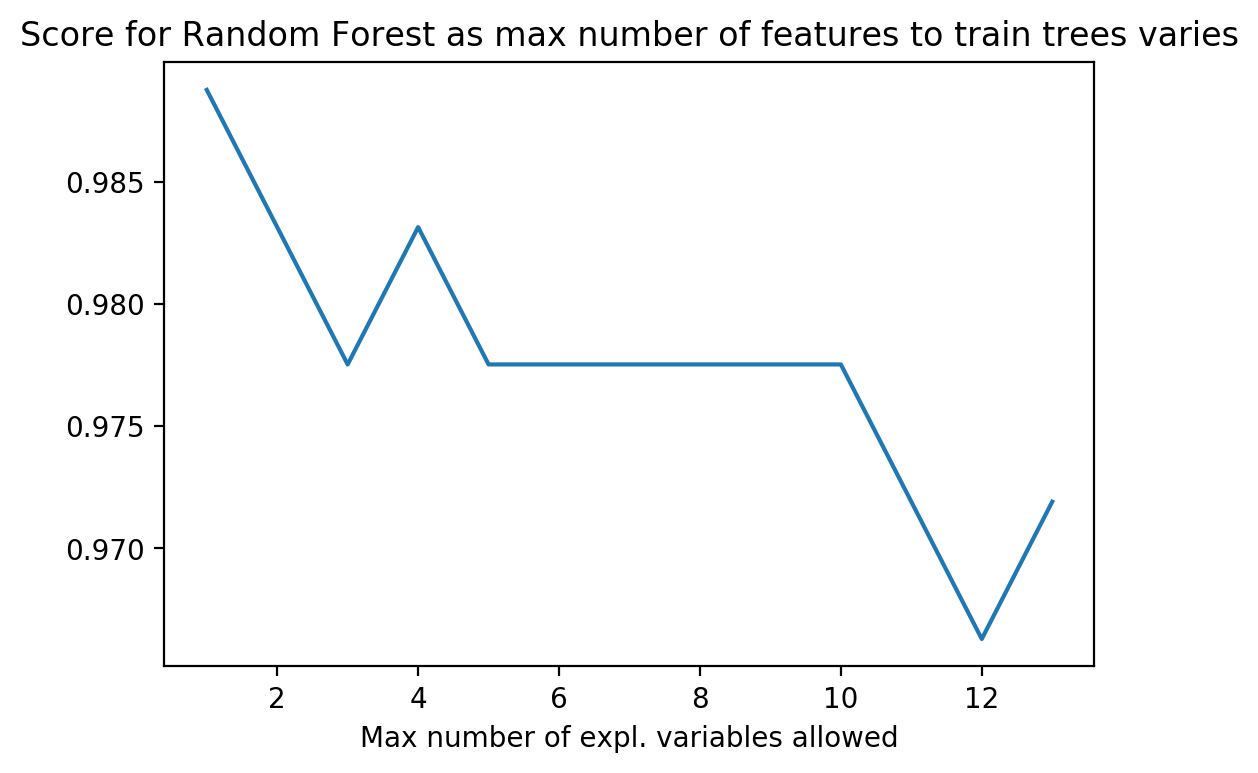

In [56]:
plt.figure()

plt.plot(np.arange(1,X.shape[1] + 1), scores)
plt.title("Score for Random Forest as max number of features to train trees varies")
plt.xlabel("Max number of expl. variables allowed")